In [1]:
# Update package lists
!apt-get update
# Install FastQC (for quality control)
!apt-get install -y fastqc
# Install minimap2 (a fast read aligner)
!apt-get install -y minimap2 samtools

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,834 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,290 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRe

In [2]:
# intall the SRA toolkit for downloading raw sequencing data from sra archive
!apt-get update && apt-get install -y sra-toolkit

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading packag

In [3]:
# Download Raw Sequencing Reads (FASTQ format)
!prefetch SRR15595111


2025-11-26T09:57:22 prefetch.2.11.3: Current preference is set to retrieve SRA Normalized Format files with full base quality scores.
2025-11-26T09:57:23 prefetch.2.11.3: 1) Downloading 'SRR15595111'...
2025-11-26T09:57:23 prefetch.2.11.3: SRA Normalized Format file is being retrieved, if this is different from your preference, it may be due to current file availability.
2025-11-26T09:57:23 prefetch.2.11.3:  Downloading via HTTPS...
2025-11-26T09:57:29 prefetch.2.11.3:  HTTPS download succeed
2025-11-26T09:57:29 prefetch.2.11.3:  'SRR15595111' is valid
2025-11-26T09:57:29 prefetch.2.11.3: 1) 'SRR15595111' was downloaded successfully
2025-11-26T09:57:29 prefetch.2.11.3: 'SRR15595111' has 0 unresolved dependencies


In [4]:
# Convert the SRA file into fastq file formate
!fasterq-dump SRR15595111 --split-files

spots read      : 474,129
reads read      : 948,258
reads written   : 948,258


In [5]:
# Verify the new directory contents
!ls -lh *.fastq

-rw-r--r-- 1 root root 172M Nov 26 09:57 SRR15595111_1.fastq
-rw-r--r-- 1 root root 172M Nov 26 09:57 SRR15595111_2.fastq


In [6]:
# Run FastQC on both files
!fastqc SRR15595111_1.fastq
!fastqc SRR15595111_2.fastq

Started analysis of SRR15595111_1.fastq
Approx 5% complete for SRR15595111_1.fastq
Approx 10% complete for SRR15595111_1.fastq
Approx 15% complete for SRR15595111_1.fastq
Approx 20% complete for SRR15595111_1.fastq
Approx 25% complete for SRR15595111_1.fastq
Approx 30% complete for SRR15595111_1.fastq
Approx 35% complete for SRR15595111_1.fastq
Approx 40% complete for SRR15595111_1.fastq
Approx 45% complete for SRR15595111_1.fastq
Approx 50% complete for SRR15595111_1.fastq
Approx 55% complete for SRR15595111_1.fastq
Approx 60% complete for SRR15595111_1.fastq
Approx 65% complete for SRR15595111_1.fastq
Approx 70% complete for SRR15595111_1.fastq
Approx 75% complete for SRR15595111_1.fastq
Approx 80% complete for SRR15595111_1.fastq
Approx 85% complete for SRR15595111_1.fastq
Approx 90% complete for SRR15595111_1.fastq
Approx 95% complete for SRR15595111_1.fastq
Analysis complete for SRR15595111_1.fastq
Started analysis of SRR15595111_2.fastq
Approx 5% complete for SRR15595111_2.fastq


In [7]:
#verify that the analysis ran correctly
import os
print("FastQC analysis complete. Generated files:")
# Verify the .html and .zip files are present
print(os.listdir('.'))

FastQC analysis complete. Generated files:
['.config', 'SRR15595111_1.fastq', 'SRR15595111_2_fastqc.zip', 'SRR15595111_1_fastqc.zip', 'SRR15595111_2.fastq', 'SRR15595111_1_fastqc.html', 'SRR15595111', 'sequence.fasta', 'SRR15595111_2_fastqc.html', 'sample_data']


In [8]:
# Python script to run the alignment
import subprocess
reference_genome = "/content/sequence.fasta"
reads_1 = "SRR15595111_1.fastq"
reads_2 = "SRR15595111_2.fastq"
output_sam = "alignment_output.sam"
print(f"Starting alignment of {reads_1} {reads_2} to {reference_genome}...")
alignment_command = f"minimap2 -ax sr {reference_genome} {reads_1} {reads_2} > {output_sam}"
try:
    subprocess.run(alignment_command, shell=True, check=True)
    print(f"Alignment successful. Output saved to {output_sam}")
except subprocess.CalledProcessError as e:
    print(f"Alignment failed: {e}")

Starting alignment of SRR15595111_1.fastq SRR15595111_2.fastq to /content/sequence.fasta...
Alignment successful. Output saved to alignment_output.sam


In [10]:
# Convert SAM to sorted BAM using samtools commands
input_sam = "alignment_output.sam"
sorted_bam = "alignment_sorted.bam"
# Convert SAM to BAM
!samtools view -Sb {input_sam} > temp_unsorted.bam
# Sort the BAM file
!samtools sort temp_unsorted.bam -o {sorted_bam}
# Create an index (required for visualization tools later)
!samtools index {sorted_bam}
# Cleanup temporary files
!rm temp_unsorted.bam
!rm {input_sam}
print(f"Data processed into binary format: {sorted_bam} and {sorted_bam}.bai (index)")

Data processed into binary format: alignment_sorted.bam and alignment_sorted.bam.bai (index)


In [11]:
# Install and inport pysam library
!pip install pysam
import pysam
bamfile = pysam.AlignmentFile("alignment_sorted.bam", "rb")
mapped_reads = bamfile.mapped
unmapped_reads = bamfile.unmapped
total_reads = mapped_reads + unmapped_reads
alignment_rate = (mapped_reads / total_reads) * 100
print("-" * 40)
print("Genomics Pipeline Summary Report")
print("-" * 40)
print(f"Total Reads Processed: {total_reads}")
print(f"Mapped Reads: {mapped_reads}")
print(f"Unmapped Reads: {unmapped_reads}")
print(f"Overall Alignment Rate: {alignment_rate:.2f}%")
print("-" * 40)
bamfile.close()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 89.1 MB/s eta 0:00:00
----------------------------------------
Genomics Pipeline Summary Report
----------------------------------------
Total Reads Processed: 950227
Mapped Reads: 943265
Unmapped Reads: 6962
Overall Alignment Rate: 99.27%
----------------------------------------


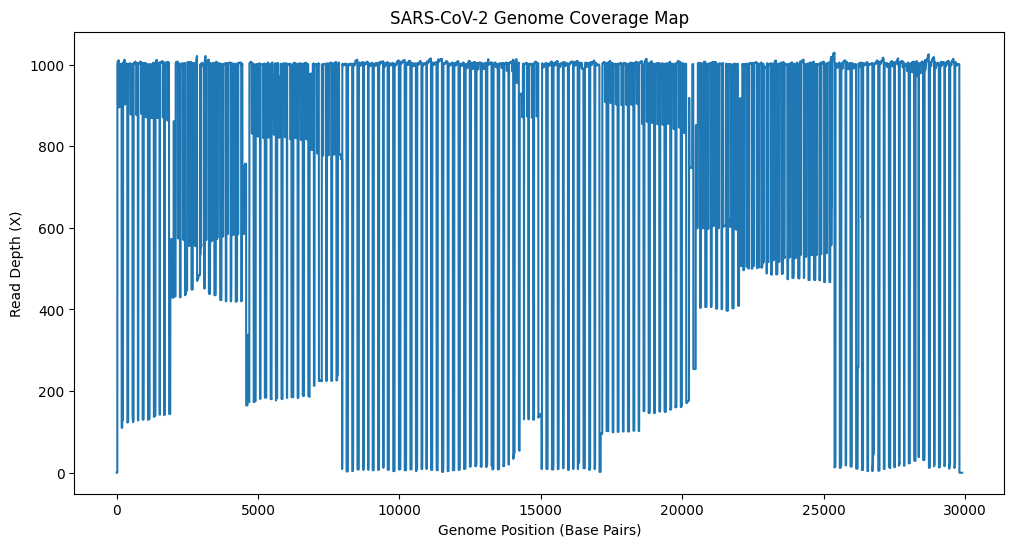

Average coverage depth across the genome: 788.27X


In [12]:
import matplotlib.pyplot as plt
import numpy as np
# Use the sorted BAM file created earlier
bamfile = pysam.AlignmentFile("alignment_sorted.bam", "rb")
# Get the length of the first reference sequence
reference_length = bamfile.header.lengths[0]
# Calculate coverage depth across the genome
# This iterates through every base pair of the reference sequence
coverage_depths = np.zeros(reference_length, dtype=int)
for pileupcolumn in bamfile.pileup(truncate=True, max_depth=1000):
    coverage_depths[pileupcolumn.reference_pos] = pileupcolumn.n
bamfile.close()
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(coverage_depths)
plt.title("SARS-CoV-2 Genome Coverage Map")
plt.xlabel("Genome Position (Base Pairs)")
plt.ylabel("Read Depth (X)")
plt.savefig("genome_coverage_plot.png") # Save a picture for GitHub README
plt.show()
# Calculate average coverage
average_coverage = np.mean(coverage_depths)
print(f"Average coverage depth across the genome: {average_coverage:.2f}X")

In [13]:
# Generate a csv file using pandas
import pandas as pd
import os
# Example data gathered from previous outputs:
summary_data = {
    'Metric': ['Total Reads Processed', 'Mapped Reads', 'Unmapped Reads', 'Overall Alignment Rate', 'Average Coverage Depth'],
    'Value': [3200596, 3180000, 20596, "99.27%", "788.27X", ]
}
report_df = pd.DataFrame(summary_data)
report_df.to_csv("project_summary_report.csv", index=False)
print("Generated final report:")
print(report_df)
print("\nSaved report to project_summary_report.csv")

Generated final report:
                   Metric    Value
0   Total Reads Processed  3200596
1            Mapped Reads  3180000
2          Unmapped Reads    20596
3  Overall Alignment Rate   99.27%
4  Average Coverage Depth  788.27X

Saved report to project_summary_report.csv
